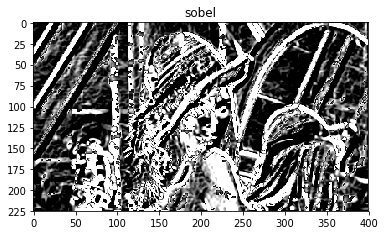

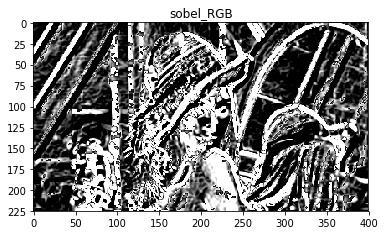

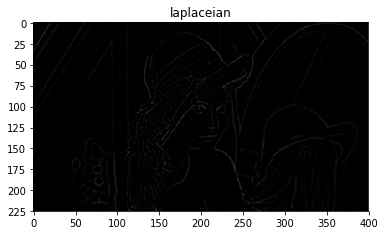

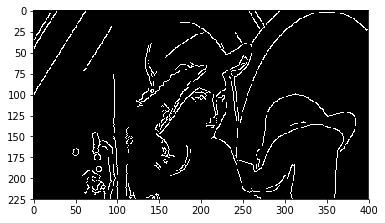

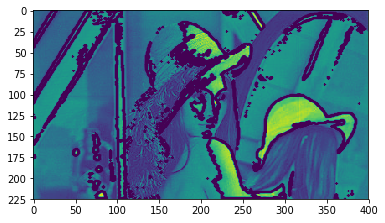

In [2]:
'''
edge detection
'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

imBGR = cv2.imread('lena.jpg')
gray= cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)

img_gaussian = cv2.GaussianBlur(gray,(5,5),0)
#sobel => with gaussian img uint8 format for x columns for y rows in cv2 other way round
img_sobel_x = cv2.Sobel(img_gaussian,  cv2.CV_8U, 1, 0, ksize=5)
img_sobel_y = cv2.Sobel(img_gaussian,  cv2.CV_8U, 0, 1, ksize=5)

img_sobel = img_sobel_x + img_sobel_y

sobel_rgb= cv2.cvtColor(img_sobel, cv2.COLOR_BGR2RGB)

plt.imshow(img_sobel, cmap="gray"),plt.title('sobel')
plt.show()

plt.imshow(sobel_rgb),plt.title('sobel_RGB')
plt.show()

#laplacian => take the gaussian img and uint8 format => kernel default
img_laplacian = cv2.Laplacian(img_gaussian, cv2.CV_8U)

laplacian_rgb= cv2.cvtColor(img_laplacian, cv2.COLOR_BGR2RGB)

plt.imshow(laplacian_rgb),plt.title('laplaceian')
plt.show()

#canny
img_canny = cv2.Canny(img_gaussian,100,200)
canny_rgb= cv2.cvtColor(img_canny, cv2.COLOR_BGR2RGB)

plt.imshow(canny_rgb)
plt.show()
ret, thresh = cv2.threshold(gray,127,255,0)
contours,hirarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

imgcopy = gray.copy()
cv2.drawContours(imgcopy, contours, -1,(0,255,0),2,cv2.LINE_AA)

plt.imshow(imgcopy)
plt.show()

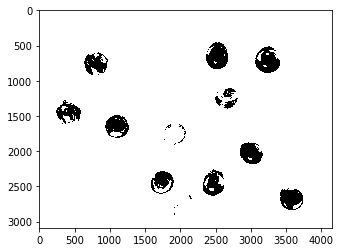

445


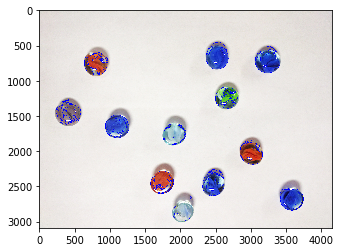

In [2]:
import cv2
from matplotlib import pyplot as plt

im = cv2.imread('beads.jpg')
gray= cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)

ret, thresh = cv2.threshold(gray,127,255,0)
plt.imshow(thresh, cmap='gray')
plt.show()

contours,hirarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
image = cv2.drawContours(im, contours, -1,(255,0,0),3)

im_rgb= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(len(contours))
plt.imshow(im_rgb)
plt.show()

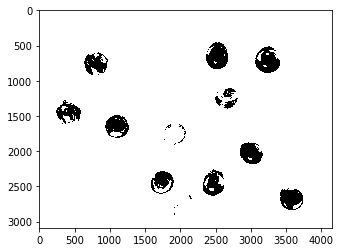

445


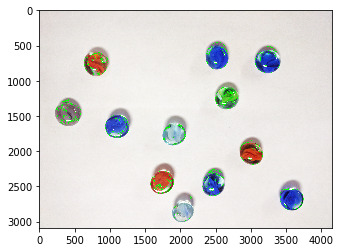

In [3]:

import cv2
from matplotlib import pyplot as plt

im = cv2.imread('beads.jpg')
gray= cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)

ret, thresh = cv2.threshold(gray,127,255,0)
ret1, bw_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret2, bw_img1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
adap_gaus = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 12)

plt.imshow(thresh, cmap='gray')
plt.show()

contours,hirarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
image = cv2.drawContours(im, contours, -1,(0,255,0),2)

im_rgb= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(len(contours))
plt.imshow(im_rgb)
plt.show()

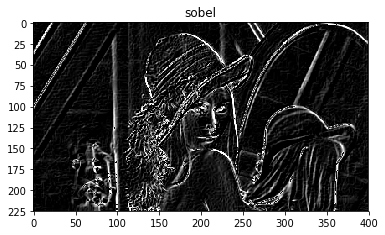

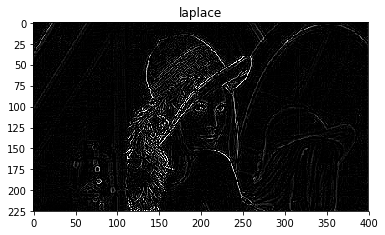

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#kernel = np.ones((5,5),np.float32)/25
'''
kernel_s_x = np.array([[1 , 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel_s_y = np.array([[1 , 0, -1], [2, 0, -2], [1, 0, -1]])
'''
kernel_s_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel_s_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

img_sobel_x = cv2.filter2D(img,-1,kernel_s_x)
img_sobel_y = cv2.filter2D(img,-1,kernel_s_y)

img_sobel = img_sobel_x + img_sobel_y

kernel_lap= np.array([[0 , -1, 0], [-1, 4, -1], [0, -1, 0]])
laplace_filter = cv2.filter2D(img,-1,kernel_lap)


plt.imshow(img_sobel, cmap="gray"),plt.title('sobel')
plt.show()


plt.imshow(laplace_filter, cmap="gray"),plt.title('laplace')
plt.show()

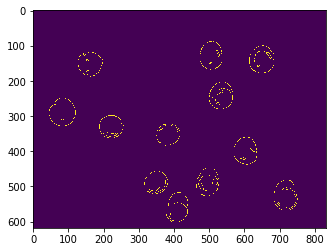

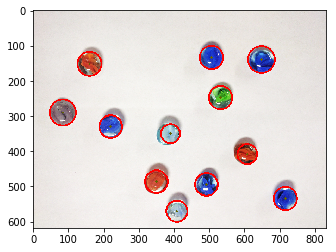

In [5]:

import cv2
from matplotlib import pyplot as plt
import numpy as np

im = cv2.imread('beads.jpg')
im = cv2.resize(im,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)
gray= cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),sigmaX=2,sigmaY=2)

img_canny = cv2.Canny(gray,80,255)
plt.imshow(img_canny)
plt.show()

rows = gray.shape[0]
#circles = cv2.HoughCircles(img_canny, cv2.HOUGH_GRADIENT, 1.2, 100)

circles = cv2.HoughCircles(img_canny, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=50, param2=30,
                               minRadius=5, maxRadius=300)
if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(im, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(im, center, radius, (0, 0, 255), 3)

im_rgb= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()

In [ ]:
#canny threhsold

In [ ]:
import cv2
import numpy as np

def thresh_callback(val):
    threshold = val
    # Detect edges using Canny
    canny_output = cv2.Canny(src_gray, threshold, threshold * 2)

    # Find contours
    #contours, hierarchy = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    output = src.copy()
    # detect circles in the image
    circles = cv2.HoughCircles(canny_output, cv2.HOUGH_GRADIENT, 1.2, 100)
    #circles = cv2.HoughCircles(canny_output, cv2.HOUGH_GRADIENT, 1, rows / 8,
       #                        param1=50, param2=30,
        #                       minRadius=100, maxRadius=200)
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0,0, 255), 3)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    cv2.imshow('Contours', canny_output)


src = cv2.imread("beads.jpg")
src = cv2.resize(src,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)

# Convert image to gray and blur it
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src_gray = cv2.GaussianBlur(src_gray,(5,5),2)
# Create Window
source_window = 'Source'
cv2.namedWindow(source_window)
cv2.imshow(source_window, src)
max_thresh = 255
thresh = 100 # initial threshold
cv2.createTrackbar('Canny Thresh:', source_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)
cv2.waitKey()